# Classifiers
In this lab session we will use the library scikit-learn to apply the following classifier algorithms:
1. Support Vector Machines (SVM)
2. K-Nearest Neighbor
3. Naive Bayes
4. Decision Trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay

We load the iris data from scikit learn, the data contains information about the Iris plant, there are three types/classes: Setosa, Versicolor, and Virginica. The data contains four features: sepal length, sepal width, petal length, and petal width all in centimeters.

In [2]:
iris = datasets.load_iris()
X = iris.data
C = iris.target
print(f'Iris types : {iris.target_names}')
print(f'Features : {iris.feature_names}')
print("Number of datapoints:", len(C))

Iris types : ['setosa' 'versicolor' 'virginica']
Features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of datapoints: 150


### Question 1
Make a plot to visualize the data. To do so, we will choose two features from the four possible. 

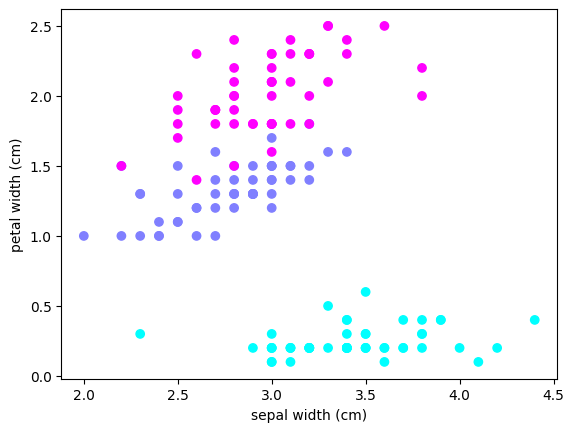

In [3]:
feature1 = 1
feature2 = 3

plt.figure()

plt.scatter(X[:, feature1], X[:, feature2], c=C, cmap='cool')
plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])

plt.show()

### Test/Train Split

### Question 2
Perform a Test/Train split by leaving 25 data samples for testing. For that, we will use the function `np.random.permutations()`.

In [4]:
np.random.seed(0)
indices = np.random.permutation(len(X))
Xtrain = X[indices[:-25]]
Ctrain = C[indices[:-25]]
Xtest = X[indices[-25:]]
Ctest = C[indices[-25:]]

### Support Vector Machines (SVM)
The function below is used to plot the decision boundaries predicted by a model, together with the datapoints in the 2D plane (sepal length, sepal width).

In [5]:
def plot_decision_boundaries(model, X, C):                                                                      
    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        model,
        X[:, :2],
        ax=ax,
        cmap='cool',
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=C,
        cmap='cool',
        edgecolors='k'
    )

### Question 3
Use sklearn to fit an SVM model, use the first two feature vectors only and plot the decision boundaries. <br>
Change the kernel to check how that affects the decision boundary.

Text(0.5, 1.0, '3-Class classification SVM linear')

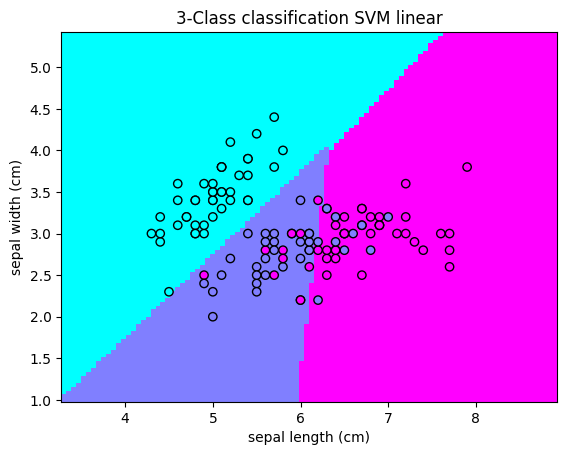

In [6]:
# Example for a linear kernel
svc1 = svm.SVC(kernel='linear')
svc1.fit(Xtrain[:, :2], Ctrain)
plot_decision_boundaries(svc1, Xtrain, Ctrain)
plt.title("3-Class classification SVM linear")

Text(0.5, 1.0, '3-Class classification SVM poly 3rd degree')

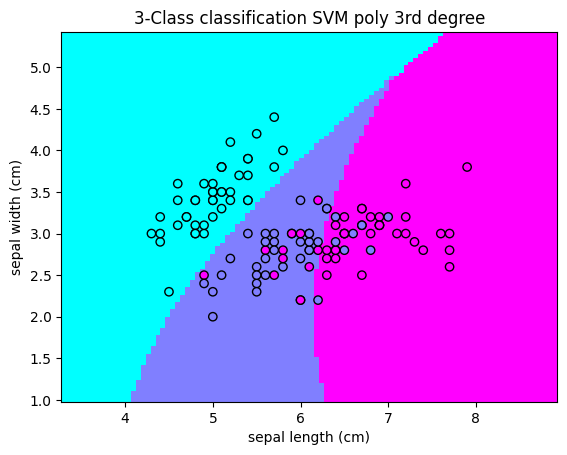

In [7]:
svc3 = svm.SVC(kernel='poly', degree=3)
svc3.fit(Xtrain[:, :2], Ctrain)
plot_decision_boundaries(svc3, Xtrain, Ctrain)
plt.title("3-Class classification SVM poly 3rd degree")

### Question 4
Use the trained model to predict the labels of the testing set, and evaluate the prediction.

In [8]:
Cpredict = svc1.predict(Xtest[:, :2])
print(f'Pred array: {Cpredict}')
print(f'Test array: {Ctest}')
print("Number of errors:", np.sum(Cpredict != Ctest))

Pred array: [0 2 1 1 1 2 2 2 2 0 1 2 1 0 2 1 1 2 0 0 0 2 1 2 0]
Test array: [0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Number of errors: 5


### K-Nearest Neighbors

### Question 5
We now use the KNN model. Fit the first two features of the data and plot the boundaries again for this model. 
This time change the neighbors parameter to see how that affects the decision boundary.

In [9]:
# Create and fit a nearest-neighbor classifier
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors, weights='uniform')
knn.fit(Xtrain[:, :2], Ctrain)

KNeighborsClassifier(n_neighbors=3)

Text(0.5, 1.0, '3-Class classification (k = 3)')

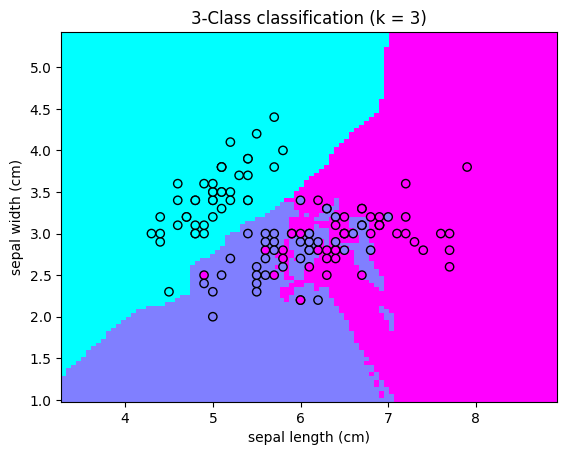

In [10]:
plot_decision_boundaries(knn, Xtrain, Ctrain)
plt.title(
    "3-Class classification (k = %i)" % (n_neighbors)
)

In [11]:
Cpredict = knn.predict(Xtest[:, :2])
print(f'Pred array: {Cpredict}')
print(f'Test array: {Ctest}')
print("Number of errors:", np.sum(Cpredict != Ctest))

Pred array: [0 2 1 2 2 2 1 2 1 0 1 1 2 0 1 1 1 1 0 0 0 1 2 2 0]
Test array: [0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Number of errors: 7


### Naive Bayes Classifier

### Question 6
Same question for a Gaussian naive Bayes model.

In [12]:
model = GaussianNB()
gnb = model.fit(Xtrain[:, :2], Ctrain)

Text(0.5, 1.0, 'Gaussain Naive Bayes Classifier')

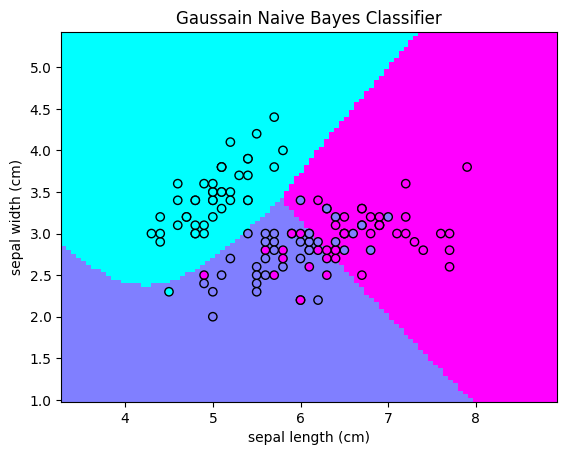

In [13]:
plot_decision_boundaries(gnb, Xtrain, Ctrain)
plt.title("Gaussain Naive Bayes Classifier")

In [14]:
Cpredict = gnb.predict(Xtest[:, :2])
print(f'Pred array: {Cpredict}')
print(f'Test array: {Ctest}')
print("Number of errors:", np.sum(Cpredict != Ctest))

Pred array: [0 2 1 1 1 2 2 1 2 0 1 2 1 0 2 1 1 1 0 0 0 2 1 2 0]
Test array: [0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Number of errors: 3


### Decision Trees

### Question 7
Same question for a decision tree model (playing with the parameter `max_depth`). 
Use all the features this time, and create a graph that shows the decision tree.

In [15]:
dectree = tree.DecisionTreeClassifier(max_depth=2)
dectree.fit(Xtrain, Ctrain)

DecisionTreeClassifier(max_depth=2)

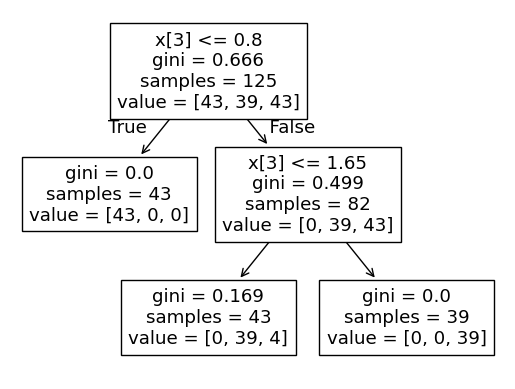

In [16]:
tree.plot_tree(dectree);

In [17]:
Cpredict = dectree.predict(Xtest)
print(f'Pred array: {Cpredict}')
print(f'Test array: {Ctest}')
print("Number of errors:", np.sum(Cpredict != Ctest))

Pred array: [0 2 1 1 1 2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]
Test array: [0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Number of errors: 2
